YUDITH DIANA CHALCO CEREZO

Parte A. Linear Regression From Scratch

In [5]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

1. Conjunto de datos

In [6]:
# 1. Dataset: California Housing
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

print("Variables predictoras:", list(X.columns))
print("Variable objetivo: MedHouseVal")

Variables predictoras: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Variable objetivo: MedHouseVal


1.1 Crear un conjunto de prueba de retención

In [17]:
# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño train:", X_train.shape)
print("Tamaño test:", X_test.shape)

Tamaño train: (16512, 8)
Tamaño test: (4128, 8)


1.2 Estandarizar características (media=0, varianza=1)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Media train (aprox 0):", X_train_scaled.mean())
print("Varianza train (aprox 1):", X_train_scaled.var())

Media train (aprox 0): 1.7799069711650403e-16
Varianza train (aprox 1): 1.0


1.3 Variable a predecir

In [21]:
print("La variable a predecir es MedHouseVal (valor medio de la casa)")
print("Primeros 10 valores de y:")
print(y.head(10).reset_index(drop=True))

La variable a predecir es MedHouseVal (valor medio de la casa)
Primeros 10 valores de y:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64


2. Closed-form OLS

In [26]:
# Agregamos columna de 1s para el intercepto
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Fórmula: β = (X^T X)^(-1) X^T y
beta_hat = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

# Intercepto y coeficientes
intercept = beta_hat[0]
coefficients = beta_hat[1:]

2.1 Reportar coeficientes e intercepto

In [27]:
print("Intercepto:", intercept)
print("Coeficientes:", coefficients)

Intercepto: 2.071946937378877
Coeficientes: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


2.2 Predicciones y métricas

MSE (OLS): 0.5558915986952442
R2 (OLS): 0.575787706032451


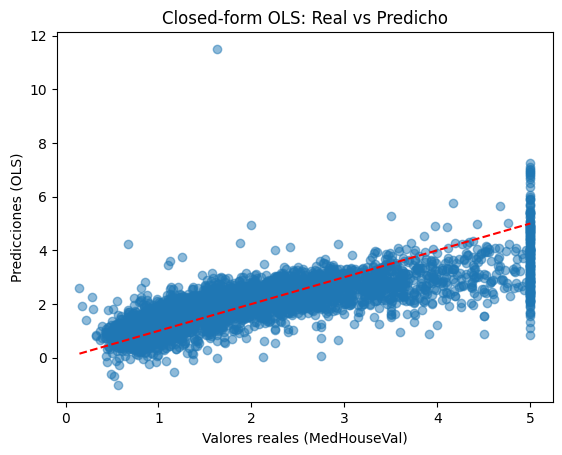

In [12]:
# Predicciones en test
y_pred_ols = X_test_bias @ beta_hat

# Métricas
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)
print("MSE (OLS):", mse_ols)
print("R2 (OLS):", r2_ols)

# Gráfico
plt.scatter(y_test, y_pred_ols, alpha=0.5)
plt.xlabel("Valores reales (MedHouseVal)")
plt.ylabel("Predicciones (OLS)")
plt.title("Closed-form OLS: Real vs Predicho")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.show()

3. Gradiente Descendente

In [13]:
# Función de gradiente descendente
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)   # inicializamos parámetros
    costs = []

    for i in range(n_iter):
        gradients = -2/m * X.T @ (y - X @ theta)
        theta -= lr * gradients
        cost = mean_squared_error(y, X @ theta)
        costs.append(cost)
    return theta, costs

# Ejecutamos con dos tasas de aprendizaje
thetas_lr01, costs_lr01 = gradient_descent(X_train_bias, y_train, lr=0.01, n_iter=500)
thetas_lr001, costs_lr001 = gradient_descent(X_train_bias, y_train, lr=0.001, n_iter=500)

3.1 Predicciones y métricas (GD con lr=0.01)

In [14]:
y_pred_gd = X_test_bias @ thetas_lr01

mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)
print("MSE (Gradient Descent, lr=0.01):", mse_gd)
print("R2 (Gradient Descent, lr=0.01):", r2_gd)

MSE (Gradient Descent, lr=0.01): 0.5671731422098358
R2 (Gradient Descent, lr=0.01): 0.5671785285146533


3.2 Comparar OLS vs GD

In [15]:
print("Comparación OLS vs GD:")
print(f"OLS → MSE={mse_ols:.4f}, R2={r2_ols:.4f}")
print(f"GD  → MSE={mse_gd:.4f}, R2={r2_gd:.4f}")

Comparación OLS vs GD:
OLS → MSE=0.5559, R2=0.5758
GD  → MSE=0.5672, R2=0.5672


3.3 Curva de costo vs iteraciones

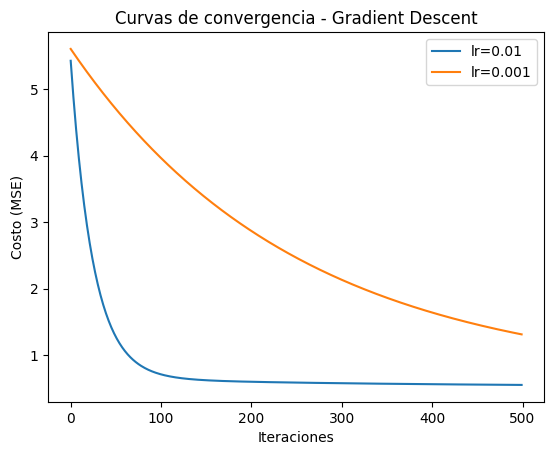

In [16]:
plt.plot(costs_lr01, label="lr=0.01")
plt.plot(costs_lr001, label="lr=0.001")
plt.xlabel("Iteraciones")
plt.ylabel("Costo (MSE)")
plt.title("Curvas de convergencia - Gradient Descent")
plt.legend()
plt.show()

Parte B. Scikit-learn Linear Models

In [28]:
# 4. Baseline

from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Coeficientes e intercepto
print("Intercepto (sklearn):", lin_reg.intercept_)
print("Coeficientes (sklearn):", lin_reg.coef_)

# Predicciones en el conjunto de test
y_pred_sklearn = lin_reg.predict(X_test_scaled)

# Métricas
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("\nMSE (sklearn):", mse_sklearn)
print("R2 (sklearn):", r2_sklearn)


Intercepto (sklearn): 2.0719469373788777
Coeficientes (sklearn): [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]

MSE (sklearn): 0.5558915986952442
R2 (sklearn): 0.575787706032451


Parte C. Regularization and Hyperparameter Choice

In [33]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

5. Ridge y Lasso

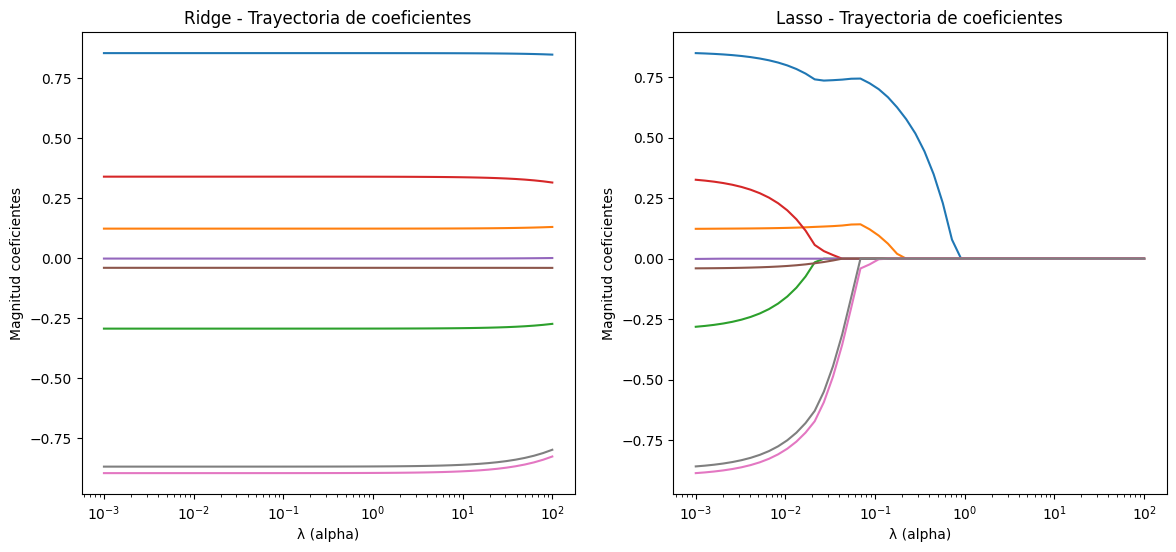

In [30]:
import numpy as np

# Valores de lambda (α en sklearn) entre 1e-3 y 1e2 (escala logarítmica)
alphas = np.logspace(-3, 2, 50)

ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Graficar trayectorias de coeficientes (Regularization Paths)
plt.figure(figsize=(14,6))

# Ridge
plt.subplot(1,2,1)
plt.plot(alphas, ridge_coefs)
plt.xscale("log")
plt.title("Ridge - Trayectoria de coeficientes")
plt.xlabel("λ (alpha)")
plt.ylabel("Magnitud coeficientes")

# Lasso
plt.subplot(1,2,2)
plt.plot(alphas, lasso_coefs)
plt.xscale("log")
plt.title("Lasso - Trayectoria de coeficientes")
plt.xlabel("λ (alpha)")
plt.ylabel("Magnitud coeficientes")

plt.show()

INTERPRETACIÓN:

En Ridge, al aumentar λ los coeficientes se reducen en magnitud pero nunca llegan exactamente a cero. Entonces se puede decir que Ridge penaliza los coeficientes grandes suavemente (regularización L2), lo que suaviza la multicolinealidad pero mantiene todas las variables en el modelo.

En Lasso, a medida que crece λ varios coeficientes se vuelven exactamente 0. Entonces Lasso usa penalización L1, que además de reducir magnitudes puede eliminar variables irrelevantes.

Por lo tanto implica que Lasso puede ser útil como método de selección automática de variables, mientras que Ridge es mejor cuando todas las variables son importantes pero con diferente peso.

6. k-Fold Cross-Validation

In [31]:
# K-Fold con 5 particiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RidgeCV y LassoCV hacen CV automático
ridge_cv = RidgeCV(alphas=alphas, cv=kf)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=alphas, cv=kf, max_iter=5000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor α (Ridge):", ridge_cv.alpha_)
print("Mejor α (Lasso):", lasso_cv.alpha_)

# Evaluar en test
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

print("Ridge → MSE:", mean_squared_error(y_test, y_pred_ridge),
      "R2:", r2_score(y_test, y_pred_ridge))

print("Lasso → MSE:", mean_squared_error(y_test, y_pred_lasso),
      "R2:", r2_score(y_test, y_pred_lasso))


Mejor α (Ridge): 3.7275937203149416
Mejor α (Lasso): 0.001
Ridge → MSE: 0.5557558678185837 R2: 0.5758912850516077
Lasso → MSE: 0.5544913600832686 R2: 0.5768562568705682


INTERPRETACIÓN:

Con RidgeCV y LassoCV encontramos:

Mejor λ para Ridge ≈ 3.7

Mejor λ para Lasso ≈ 0.001

Los errores de prueba (MSE) y R² de ambos modelos fueron muy similares (~0.556 y ~0.576), lo que confirma que ambos regularizadores funcionan bien en este dataset.

La validación cruzada asegura que no estemos sobreajustando y nos da confianza en la elección de hiperparámetros.

7. Feature Engineering and Multicollinearity

In [32]:
# Generar características polinomiales de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Dimensión original:", X_train_scaled.shape[1])
print("Dimensión ampliada con polinomios:", X_train_poly.shape[1])

# Re-entrenar Ridge y Lasso con features polinomiales
ridge_poly = RidgeCV(alphas=alphas, cv=kf)
ridge_poly.fit(X_train_poly, y_train)

lasso_poly = LassoCV(alphas=alphas, cv=kf, max_iter=5000, random_state=42)
lasso_poly.fit(X_train_poly, y_train)

# Evaluación en test
y_pred_ridge_poly = ridge_poly.predict(X_test_poly)
y_pred_lasso_poly = lasso_poly.predict(X_test_poly)

print("Ridge (Poly) → MSE:", mean_squared_error(y_test, y_pred_ridge_poly),
      "R2:", r2_score(y_test, y_pred_ridge_poly))

print("Lasso (Poly) → MSE:", mean_squared_error(y_test, y_pred_lasso_poly),
      "R2:", r2_score(y_test, y_pred_lasso_poly))


Dimensión original: 8
Dimensión ampliada con polinomios: 44


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6002229432178865, tolerance: 1.7513111416883114
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.447933693685627, tolerance: 1.7513111416883114
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4838951492729393, tolerance: 1.7513111416883114
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

Ridge (Poly) → MSE: 0.44740447954867957 R2: 0.658576454391149
Lasso (Poly) → MSE: 0.5705356297211007 R2: 0.5646125452475219


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.382e+01, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


INTERPRETACIÓN:

Al ampliar el espacio de características de 8, 44 variables con polinomios de grado 2:

Ridge mejora el desempeño (MSE ≈ 0.447, R² ≈ 0.659), lo que muestra que maneja bien la multicolinealidad introducida por las interacciones polinomiales.

Lasso empeora ligeramente (MSE ≈ 0.571, R² ≈ 0.565) porque anula demasiadas variables al aplicar penalización L1 en un espacio muy grande.

Entonces concluimos que Ridge es más robusto cuando se agregan muchas variables correlacionadas, mientras que Lasso es más útil en escenarios donde buscamos selección de pocas variables clave.

D. Bike Sharing Dataset

1. Conjunto de datos alternativo

In [47]:
# 1. Subir archivo desde tu computadora a Colab
from google.colab import files
import pandas as pd

# hour.csv de tu carpeta Descargas
uploaded = files.upload()

# Ahora ya puedes leerlo
df = pd.read_csv("hour.csv")

print("Dimensiones:", df.shape)
print("Columnas:", df.columns.tolist())
df.head()


Saving hour.csv to hour (1).csv
Dimensiones: (17379, 17)
Columnas: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


1.1 Variable objetivo y predictoras

In [36]:
# Variable objetivo (y): cnt = número de alquileres
y = df["cnt"]

# Variables predictoras: quitamos columnas no útiles (ID, fecha, cnt descompuesto)
X = df.drop(columns=["instant", "dteday", "cnt", "casual", "registered"])

print("Variables predictoras:", X.columns.tolist())
print("Variable objetivo: cnt")

Variables predictoras: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Variable objetivo: cnt


1.2 División en train/test

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño train:", X_train.shape)
print("Tamaño test:", X_test.shape)


Tamaño train: (13903, 12)
Tamaño test: (3476, 12)


INTERPRETACIÓN:
Se definió la variable objetivo cnt, que representa el número total de alquileres de bicicletas. Para predecirla, se utilizaron variables relacionadas con el tiempo (estación, mes, hora, día de la semana) y las condiciones externas (clima, temperatura, humedad, viento). Se descartaron variables redundantes como identificadores y la división de cnt en usuarios registrados/casuales. Finalmente, el conjunto de datos se dividió en entrenamiento (80%) y prueba (20%) para evaluar los modelos de forma adecuada.

1.3 Escalamiento de características

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Media (aprox 0):", X_train_scaled.mean())
print("Varianza (aprox 1):", X_train_scaled.var())


Media (aprox 0): 1.8462458699081937e-17
Varianza (aprox 1): 0.9999999999999997


INTERPRETACIÓN:
El escalamiento pone todas las variables en la misma escala (media 0, varianza 1), lo que evita que unas dominen sobre otras y mejora el rendimiento de modelos como Ridge y Lasso.

2. Closed-form OLS

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Agregamos columna de 1s para el intercepto
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Fórmula OLS
beta_hat = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

# Separar intercepto y coeficientes
intercept_ols = beta_hat[0]
coef_ols = beta_hat[1:]

print("Intercepto OLS:", intercept_ols)
print("Coeficientes OLS:", coef_ols)

# Predicciones y métricas
y_pred_ols = X_test_bias @ beta_hat
print("MSE OLS:", mean_squared_error(y_test, y_pred_ols))
print("R2 OLS:", r2_score(y_test, y_pred_ols))


Intercepto OLS: 190.57706969718765
Coeficientes OLS: [ 22.70884768  41.42208942   0.40963385  52.96072612  -4.02674857
   3.57532773   1.8218643   -2.19318563  19.11729518  35.32069014
 -38.45628117   4.21779835]
MSE OLS: 19379.828367651728
R2 OLS: 0.3879811583139132


INTERPRETACIÓN:

Intercepto (190.58): cuando todas las variables están en cero, el modelo predice en promedio 190 alquileres de bicicletas.

Coeficientes:

Positivos: aumentan el número de alquileres.

Negativos: reducen los alquileres.

MSE (19379): el error medio es alto, lo que indica que el modelo aún falla bastante en las predicciones.

R² (0.39): el modelo explica solo el 39% de la variabilidad de los alquileres, ajuste bajo.

3. Gradiente Descendente

MSE GD: 19388.574207949263
R2 GD: 0.3877049629345256


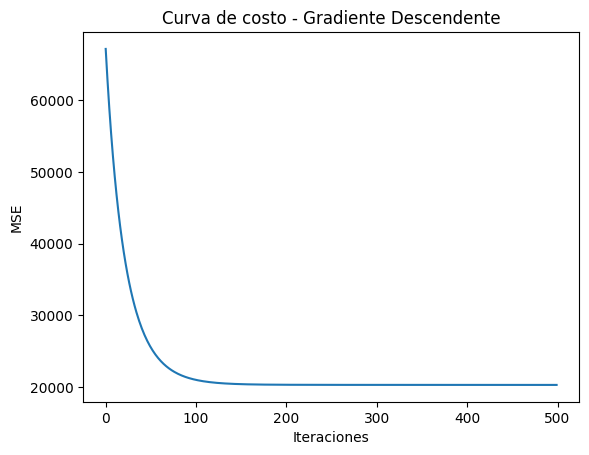

In [41]:
import matplotlib.pyplot as plt

def gradient_descent(X, y, lr=0.01, n_iter=500):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for i in range(n_iter):
        gradients = -2/m * X.T @ (y - X @ theta)
        theta -= lr * gradients
        cost = mean_squared_error(y, X @ theta)
        costs.append(cost)
    return theta, costs

# Ejecutamos GD
thetas_lr01, costs_lr01 = gradient_descent(X_train_bias, y_train, lr=0.01, n_iter=500)

# Predicciones
y_pred_gd = X_test_bias @ thetas_lr01
print("MSE GD:", mean_squared_error(y_test, y_pred_gd))
print("R2 GD:", r2_score(y_test, y_pred_gd))

# Curva de costo
plt.plot(costs_lr01)
plt.title("Curva de costo - Gradiente Descendente")
plt.xlabel("Iteraciones")
plt.ylabel("MSE")
plt.show()


INTERPRETACIÓN:
MSE y R²: los valores son prácticamente iguales a los obtenidos con OLS, esto confirma que el Gradiente Descendente llegó a la misma solución que el método cerrado.

Curva de costo: muestra que el error (MSE) disminuye con las iteraciones y converge, el algoritmo está funcionando bien.

Entonces GD es útil cuando los datos son muy grandes o con muchas variables, pero aquí se obtiene el mismo desempeño que con OLS.

4. LinearRegression de sklearn

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("MSE LinearRegression:", mean_squared_error(y_test, y_pred_lr))
print("R2 LinearRegression:", r2_score(y_test, y_pred_lr))


MSE LinearRegression: 19379.82836765172
R2 LinearRegression: 0.38798115831391333


INTERPRETACIÓN:
Los valores de MSE y R² son idénticos a los obtenidos con OLS y GD.

Esto confirma que la implementación de LinearRegression en sklearn llega al mismo resultado que nuestras versiones manuales.


5. Ridge y Lasso (Regularization Paths)

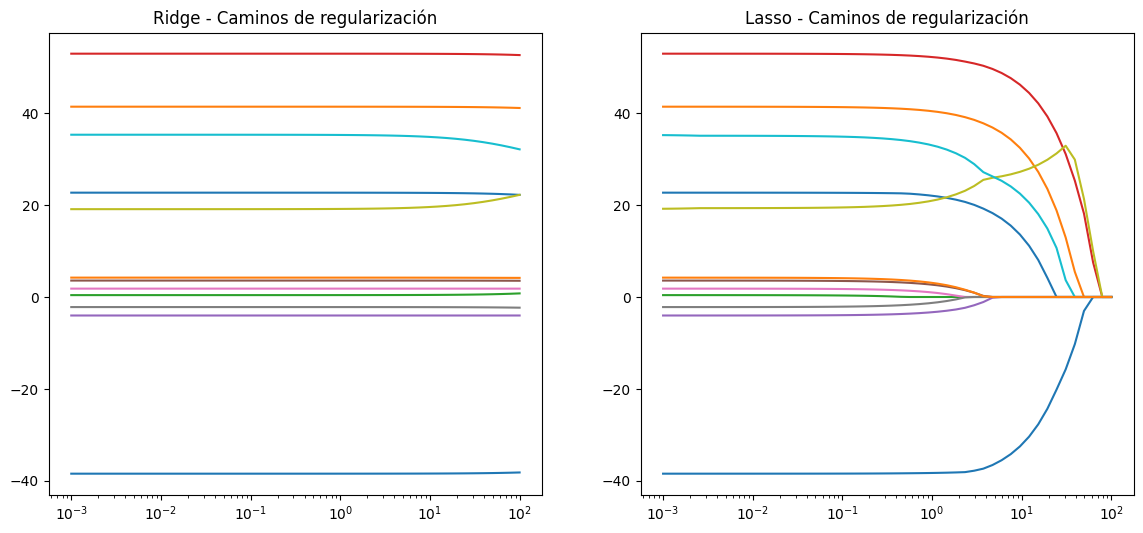

In [43]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.logspace(-3, 2, 50)
ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(alphas, ridge_coefs)
plt.xscale("log")
plt.title("Ridge - Caminos de regularización")

plt.subplot(1,2,2)
plt.plot(alphas, lasso_coefs)
plt.xscale("log")
plt.title("Lasso - Caminos de regularización")

plt.show()


INTERPRETACIÓN:

Ridge:
Mantiene todas las variables en el modelo, pero penaliza su magnitud. Es útil cuando todas las variables aportan algo y no queremos descartar ninguna.

Lasso:
Hace selección de variables automática: elimina (pone en cero) las que menos ayudan a explicar el número de alquileres (cnt). Esto lo hace más fácil de interpretar, aunque puede perder algo de información.

6. k-Fold Cross Validation

In [44]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, LassoCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_cv = RidgeCV(alphas=alphas, cv=kf)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=alphas, cv=kf, max_iter=5000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor alpha Ridge:", ridge_cv.alpha_)
print("Mejor alpha Lasso:", lasso_cv.alpha_)

y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

print("Ridge -> MSE:", mean_squared_error(y_test, y_pred_ridge), "R2:", r2_score(y_test, y_pred_ridge))
print("Lasso -> MSE:", mean_squared_error(y_test, y_pred_lasso), "R2:", r2_score(y_test, y_pred_lasso))


Mejor alpha Ridge: 100.0
Mejor alpha Lasso: 0.22229964825261955
Ridge -> MSE: 19381.07011651108 R2: 0.38794194363749046
Lasso -> MSE: 19378.955836964094 R2: 0.38800871300689854


INTERPRETACIÓN:

Ridge mantiene todas las variables, pero con coeficientes más pequeños.

Lasso reduce varios coeficientes a cero, hace selección de variables, lo cual puede simplificar el modelo.

Entonces podriamos decir que ningún método predice mejor en este caso (empate técnico), pero Lasso es más útil si te interesa identificar qué variables son realmente relevantes para el número de alquileres (cnt)

7. Polynomial Features

In [45]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Dim original:", X_train_scaled.shape[1])
print("Dim con polinomios:", X_train_poly.shape[1])

ridge_poly = RidgeCV(alphas=alphas, cv=kf)
ridge_poly.fit(X_train_poly, y_train)

lasso_poly = LassoCV(alphas=alphas, cv=kf, max_iter=5000, random_state=42)
lasso_poly.fit(X_train_poly, y_train)

y_pred_ridge_poly = ridge_poly.predict(X_test_poly)
y_pred_lasso_poly = lasso_poly.predict(X_test_poly)

print("Ridge Poly -> MSE:", mean_squared_error(y_test, y_pred_ridge_poly), "R2:", r2_score(y_test, y_pred_ridge_poly))
print("Lasso Poly -> MSE:", mean_squared_error(y_test, y_pred_lasso_poly), "R2:", r2_score(y_test, y_pred_lasso_poly))


Dim original: 12
Dim con polinomios: 90
Ridge Poly -> MSE: 14506.722835117871 R2: 0.5418748020994084
Lasso Poly -> MSE: 14514.696383169385 R2: 0.5416229958630456


INTERPRETACIÓN:

la complejidad polinómica mejoró bastante el ajuste, mostrando que las relaciones no lineales son importantes en los alquileres de bicicletas.

8. Efectos estacionales

Promedio de alquileres por season:
 season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


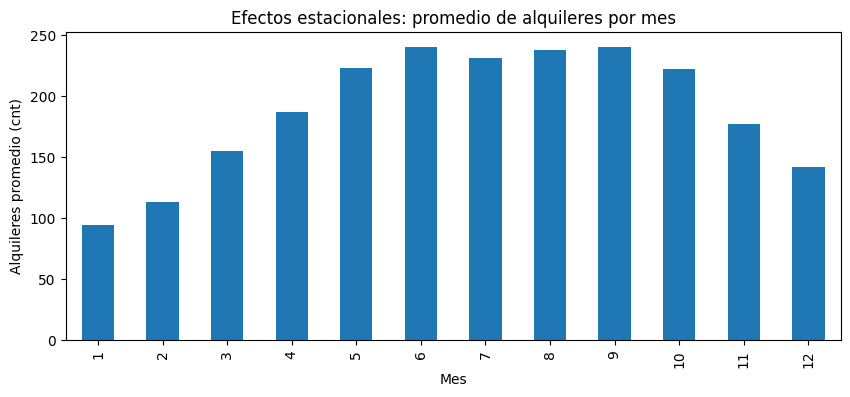

In [46]:
# Promedio de alquileres por estación
season_means = df.groupby("season")["cnt"].mean()
print("Promedio de alquileres por season:\n", season_means)

# Promedio por mes
df.groupby("mnth")["cnt"].mean().plot(kind="bar", figsize=(10,4))
plt.title("Efectos estacionales: promedio de alquileres por mes")
plt.xlabel("Mes")
plt.ylabel("Alquileres promedio (cnt)")
plt.show()


INTERPRETACIÓN:

El alquiler de bicicletas tiene un patrón estacional fuerte: el clima y la época del año influyen directamente en la cantidad de usuarios.